# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
!wget https://www.dropbox.com/s/eeqsztruadi7ufy/dataset.zip
!unzip -q dataset.zip

--2020-11-25 23:24:00--  https://www.dropbox.com/s/eeqsztruadi7ufy/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eeqsztruadi7ufy/dataset.zip [following]
--2020-11-25 23:24:00--  https://www.dropbox.com/s/raw/eeqsztruadi7ufy/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccbaa482c54aa2c845e6ad1d761.dl.dropboxusercontent.com/cd/0/inline/BD4OH1Z9ONFqo6EEPjpR3BgSdlux8H7YQXOfHyVJgs5IZjHupBPA0l_s4I7sEpa9jhODYe4vw578LlDlX2VYnygqKFSESfvtX32lDouTu-N9LYWhhfxy-I111gjfNHsLvJc/file# [following]
--2020-11-25 23:24:00--  https://uccbaa482c54aa2c845e6ad1d761.dl.dropboxusercontent.com/cd/0/inline/BD4OH1Z9ONFqo6EEPjpR3BgSdlux8H7YQXOfHyVJgs5IZjHupBPA0l_s4I7sEpa9jhODYe4vw578LlDlX2VYnygqKFSESfvtX32lDouTu-N9LYWhhfxy-

In [ ]:
!ls -l

total 215164
drwxr-xr-x 3 root root      4096 Nov  9 18:09 dataset
-rw-r--r-- 1 root root 220318689 Nov 25 23:24 dataset.zip
drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data


In [ ]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np

import os
from os.path import isfile, join
import sys

from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models

from PIL import Image
import glob

# You may add any imports you need

In [ ]:
train_transform = transforms.Compose([transforms.Resize((224, 224)), 
                                      transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
val_transform = transforms.Compose([transforms.Resize((224, 224)), 
                                    transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1)), ])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [ ]:
train_dataset[550]

(tensor([[[-0.1118, -0.1118, -0.1275,  ..., -0.2608, -0.2686, -0.2686],
          [-0.1118, -0.1118, -0.1275,  ..., -0.2608, -0.2686, -0.2686],
          [-0.1353, -0.1353, -0.1471,  ..., -0.2647, -0.2725, -0.2725],
          ...,
          [-0.1745, -0.1745, -0.1824,  ..., -0.3980, -0.4059, -0.4059],
          [-0.1941, -0.1941, -0.1980,  ..., -0.4020, -0.4098, -0.4098],
          [-0.1941, -0.1941, -0.1980,  ..., -0.4020, -0.4098, -0.4098]],
 
         [[-0.2176, -0.2176, -0.2333,  ..., -0.3353, -0.3431, -0.3431],
          [-0.2176, -0.2176, -0.2333,  ..., -0.3353, -0.3431, -0.3431],
          [-0.2412, -0.2412, -0.2529,  ..., -0.3392, -0.3471, -0.3471],
          ...,
          [-0.3000, -0.3000, -0.3039,  ..., -0.4059, -0.4098, -0.4098],
          [-0.3235, -0.3235, -0.3235,  ..., -0.4098, -0.4137, -0.4137],
          [-0.3235, -0.3235, -0.3235,  ..., -0.4098, -0.4137, -0.4137]],
 
         [[-0.2922, -0.2922, -0.3078,  ..., -0.3667, -0.3706, -0.3706],
          [-0.2922, -0.2922,

In [ ]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [ ]:
import tqdm
from sklearn.metrics import accuracy_score
from numpy import append

def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm.tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics, all_losses


def predict(model, val_dataloader, criterion, device="cuda:0"):    
    # YOUR CODE
    # predict val_dataloader and print and return the validation accuracy
    
    model = model.to(device).eval()
    total_loss = 0
    num_batches = 0
    predicted_classes = np.array([])
    true_classes = np.array([])

    with tqdm.tqdm(total=len(val_dataloader), file = sys.stdout) as prbar:
        for images, labels in val_dataloader:
            images = images.to(device)
            labels = labels.to(device)

            prediction = model(images)
            loss = criterion(prediction, labels)
            accuracy = (prediction.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)

            total_loss += loss.item()
            predicted_classes = np.append(predicted_classes, prediction.argmax(1).cpu().detach().numpy())
            true_classes = np.append(true_classes, labels.cpu().detach().numpy())
            num_batches += 1

    losses = total_loss / num_batches

    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler):
    model.to(device)
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []

    for epoch in range(n_epochs):
        # YOUR CODE
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_one_epoch(
            model=model,
            train_dataloader=train_dataloader,
            optimizer=optimizer,
            criterion=criterion
        )
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics['loss'])
        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            all_losses, predicted_labels, true_labels = predict(
                model=model,
                val_dataloader=val_dataloader,
                criterion=criterion,
            )
        # Save eval losses
    return model

In [ ]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)
# THE MODEL THAT YOU CHOOSE

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(512, 200)

optimizer = torch.optim.Adam(model.fc.parameters())
# YOUR OPTIMIZER
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)
# TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=512, shuffle=True)
# VAL DATALOADER WHICH YOU CONSTRUCT
criterion = nn.CrossEntropyLoss()
# LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None
# LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 5
# NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 5.4172 Accuracy: 0.3676: 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]
tests passed


Запустить обучение можно в ячейке ниже.

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

Train Epoch: 0
Loss: 2.2286 Accuracy: 50.625: 100%|██████████| 196/196 [06:25<00:00,  1.97s/it]
Validation Epoch: 0
Loss: 2.2319 Accuracy: 51.4706: 100%|██████████| 20/20 [00:36<00:00,  1.85s/it]
Train Epoch: 1
Loss: 1.7502 Accuracy: 58.125: 100%|██████████| 196/196 [06:16<00:00,  1.92s/it]
Validation Epoch: 1
Loss: 1.9341 Accuracy: 55.8824: 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]
Train Epoch: 2
Loss: 1.6214 Accuracy: 61.25: 100%|██████████| 196/196 [06:15<00:00,  1.92s/it]
Validation Epoch: 2
Loss: 1.6438 Accuracy: 59.5588: 100%|██████████| 20/20 [00:36<00:00,  1.85s/it]
Train Epoch: 3
Loss: 1.6071 Accuracy: 56.875: 100%|██████████| 196/196 [06:14<00:00,  1.91s/it]
Validation Epoch: 3
Loss: 1.7348 Accuracy: 58.4559: 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]
Train Epoch: 4
Loss: 1.303 Accuracy: 68.125: 100%|██████████| 196/196 [06:13<00:00,  1.91s/it]
Validation Epoch: 4
Loss: 1.4812 Accuracy: 60.6618: 100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 1.6679 Accuracy: 57.7206: 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]
Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__: в общем-то модель resnet18 с семинара показывает достаточно хорошие результаты даже если использовать веса, полученные после обучения на ImageNet'е, при этом стоит отметить что модель достаточно быстро обучилась и начала показывать приемлемое качествое

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
# we will need this library to process the labeling
! pip install xmltodict

In [2]:
import xmltodict, json

Датасет мы за вас написали.

In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [5]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [6]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader
    model.to(device).train()
    n = 0
    global_loss = 0
    for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss

def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        #model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {}".format(a))
        #model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)

In [8]:
!wget https://www.dropbox.com/s/7ijjwmtp9t1hz8h/archive.zip
!unzip -q archive.zip

--2020-11-30 15:51:31--  https://www.dropbox.com/s/7ijjwmtp9t1hz8h/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7ijjwmtp9t1hz8h/archive.zip [following]
--2020-11-30 15:51:31--  https://www.dropbox.com/s/raw/7ijjwmtp9t1hz8h/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39f41087bcac901d99dc464aad.dl.dropboxusercontent.com/cd/0/inline/BEM4uy9lAHoMJwdOf0SioklyUlu6-i-YsIX_KPFk0zTezXvadZ5SQyMdwsDE3HLzvKdE1W2ZUyZ_NBwjV_-ebpxVbWOfA6Jcy22rhDnJk9yUt4tNmIeJOqzGeq46c9jwypc/file# [following]
--2020-11-30 15:51:31--  https://uc39f41087bcac901d99dc464aad.dl.dropboxusercontent.com/cd/0/inline/BEM4uy9lAHoMJwdOf0SioklyUlu6-i-YsIX_KPFk0zTezXvadZ5SQyMdwsDE3HLzvKdE1W2ZUyZ_NBwjV_-ebpxVbWOfA6Jcy22rhDnJk9yUt4tNmIeJO

In [9]:
!ls -l

total 29056
-rw-r--r-- 1 root root 29737028 Nov 30 15:51 archive.zip
drwxr-xr-x 1 root root     4096 Nov 13 17:33 sample_data
drwxr-xr-x 3 root root     4096 Nov 30 15:51 test_zip
drwxr-xr-x 3 root root     4096 Nov 30 15:51 train_zip


In [10]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-mndhwfhw
All libraries are successfully installed!


In [7]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensor

In [8]:
train_transform = A.Compose([
    #A.Resize(),
    #A.RandomRotate90(p=0.5),
    #A.CLAHE(),
    #A.Blur(),
    A.RandomBrightness(),
    A.RandomContrast(),
    A.InvertImg(),
    A.ChannelShuffle(),
    #A.Normalize(),
    ToTensor()
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# YOUR CODE FOR AUGMENTATIONS
val_transform =  A.Compose([
    #A.Resize(),
    #A.RandomRotate90(p=0.5),
    #A.CLAHE(),
    A.InvertImg(),
    A.ChannelShuffle(),
    #A.Normalize(),
    ToTensor()
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
 # YOUR CODE FOR VALIDATION AUGMENTATIONS
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset("./train_zip/train", transform=train_transform)
val_dataset = FruitDataset("./test_zip/test", transform=val_transform)

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn


def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

num_classes = 4

model = get_detection_model(num_classes)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

model.to(device)
# YOUR CODE, CREATE MODEL FOR OBJECT DETECTION
# HINT: USE MATERIALS FROM THE SEMINAR
# YOU CAN USE torchvision.models AND torchvision.models.detection
# READ OFFICIAL DOCS FOR MORE INFO

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# SELECT YOUR OPTIMIZER

def collate_fn(batch):
    return tuple(zip(*batch))

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=1, collate_fn=collate_fn)
# CREATE YOUR DATALOADER, SELECT APPROPRIATE batch_size
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1, collate_fn=collate_fn)
# CREATE VALIDATION DATALOADER
n_epochs = 10
# SELECT APPROPRIZTE NUMBER OF EPOCHS

In [9]:
train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.002035937264585353


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.79
Loss value after 20 batches is 0.61
Loss value after 30 batches is 0.53
Loss value after 40 batches is 0.49
Loss value after 50 batches is 0.47
Loss value after 60 batches is 0.43


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.39097161296102323


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.26
Loss value after 20 batches is 0.27
Loss value after 30 batches is 0.27
Loss value after 40 batches is 0.26
Loss value after 50 batches is 0.26
Loss value after 60 batches is 0.25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.7073511131280169


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.27
Loss value after 20 batches is 0.22
Loss value after 30 batches is 0.21
Loss value after 40 batches is 0.21
Loss value after 50 batches is 0.2
Loss value after 60 batches is 0.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8097413360417302


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.16
Loss value after 20 batches is 0.17
Loss value after 30 batches is 0.16
Loss value after 40 batches is 0.17
Loss value after 50 batches is 0.16
Loss value after 60 batches is 0.17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8047897769913009


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.17
Loss value after 20 batches is 0.14
Loss value after 30 batches is 0.15
Loss value after 40 batches is 0.15
Loss value after 50 batches is 0.15
Loss value after 60 batches is 0.15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8579047801695081


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.18
Loss value after 20 batches is 0.15
Loss value after 30 batches is 0.14
Loss value after 40 batches is 0.14
Loss value after 50 batches is 0.14
Loss value after 60 batches is 0.14


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8371706981083279


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.14
Loss value after 20 batches is 0.13
Loss value after 30 batches is 0.12
Loss value after 40 batches is 0.12
Loss value after 50 batches is 0.12
Loss value after 60 batches is 0.12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8305025478369433


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.11
Loss value after 20 batches is 0.12
Loss value after 30 batches is 0.12
Loss value after 40 batches is 0.12
Loss value after 50 batches is 0.12
Loss value after 60 batches is 0.12


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8518318308617118


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.13
Loss value after 20 batches is 0.11
Loss value after 30 batches is 0.11
Loss value after 40 batches is 0.11
Loss value after 50 batches is 0.11
Loss value after 60 batches is 0.11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


AUC ON TEST: 0.8576589851300292


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss value after 10 batches is 0.11
Loss value after 20 batches is 0.11
Loss value after 30 batches is 0.11
Loss value after 40 batches is 0.1
Loss value after 50 batches is 0.1
Loss value after 60 batches is 0.1


__Выведите итоговое качество модели__.

In [10]:
score_auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * score_auc / 0.91)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Оценка за это задание составит 3.8317119352042703 баллов


In [11]:
score_auc

0.8717144652589716

Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [12]:
image, labels = next(iter(train_dataset))
pred = model(image.unsqueeze(0).to(device))[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


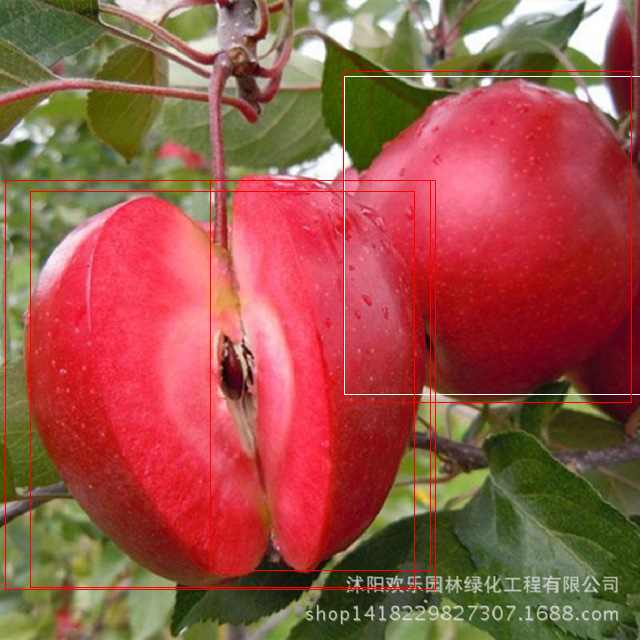

In [13]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

In [14]:
image, labels = next(iter(val_dataset))
pred = model(image.unsqueeze(0).to(device))[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


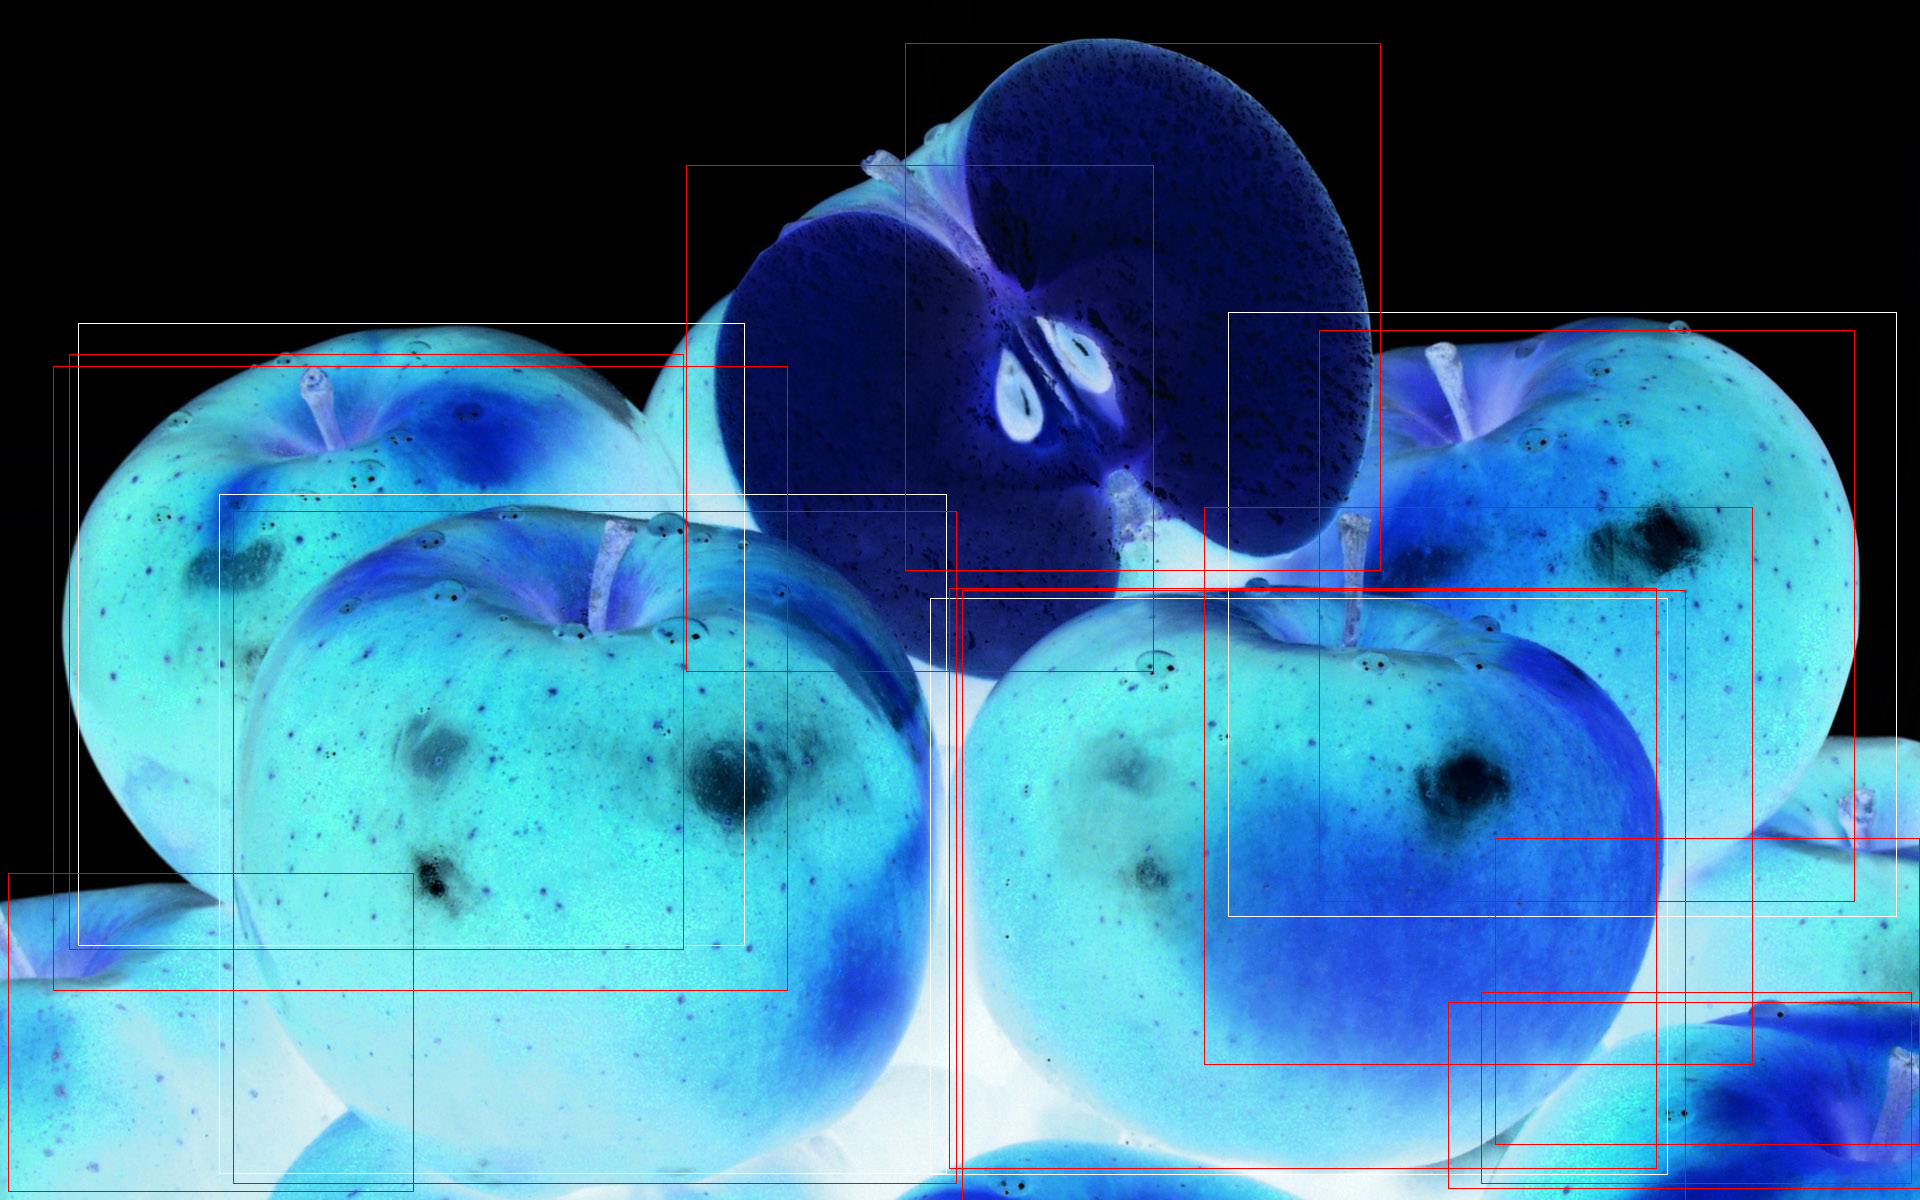

In [15]:
image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

Видно, что у модели есть проблема с тем, что она находит объекты там, где их нет, либо дублирует detection box, возможно проблема в IoU

Помимо этого модель достаточно быстро начала переобучаться

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# YOUR CODE

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.